$A = \begin{pmatrix} 2 & 0 & 2 \\ 0 & 2 & 0 \\ 0 & 0 & 2 \end{pmatrix},~~~b=(0, 0, 1)$ 

$g_0(x)=\|x-p\|-r = \sqrt{(x_1-p_1)^2 + (x_2-p_2)^2 + (x_3-p_3)^2} - r=0$

$\implies g(x)=(x_1-p_1)^2 + (x_2-p_2)^2 + (x_3-p_3)^2 - r^2 = 0$

$~$

$L(\lambda, x_1, x_2, x_3) = x_1^2 + x_2^2 + x_3^2 + x_1\cdot x_3 + x_3 + \lambda \cdot \left( (x_1-p_1)^2 + (x_2-p_2)^2 + (x_3-p_3)^2 - r^2 \right)$

$~$

$\nabla L = \theta~\to~ \begin{cases} 
(x_1-p_1)^2 + (x_2-p_2)^2 + (x_3-p_3)^2 - r^2 = 0 \\
2x_1 + x_3 + 2\lambda (x_1-p_1) = 0 \\  
2x_2 + 2\lambda (x_2-p_2) = 0 \\ 
2x_3 + x_1 + 1 + 2\lambda (x_3-p_3) = 0 \\ 
\end{cases}$

$~$

При $p=\theta,~r=1$ система примет вид: $(*)\begin{cases} 
x_1^2 + x_2^2 + x_3^2 - 1 = 0 \\
2x_1 + x_3 + 2\lambda x_1 = 0 \\  
2x_2 + 2\lambda x_2 = 0 \\ 
2x_3 + x_1 + 1 + 2\lambda x_3 = 0 \\ 
\end{cases}$

$~$

Составим гессиан для $\nabla L$:
$~~~\hat{H}=\begin{pmatrix} 
0 & 2x_1 & 2x_2 & 2x_3 \\
2x_1 & 2 + 2\lambda & 0 & 1 \\
2x_2 & 0 & 2 + 2\lambda & 0 \\
2x_3 & 1 & 0 & 2 + 2\lambda
 \end{pmatrix}$


Первое решение системы $(*)$:
 $\hat{H}=\begin{pmatrix} 
0 & -2 & 0 & 0 \\
-2 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
 \end{pmatrix}$  миноры вырождены, значит первый нуль не есть экстремум


 Второе решение системы $(*)$:
 $\hat{H}=\begin{pmatrix} 
0 & 1 & 0 & -\sqrt 3 \\
1 & \sqrt 3 & 0 & 1 \\
0 & 0 & \sqrt 3 & 0 \\
-\sqrt 3 & 1 & 0 & \sqrt 3
 \end{pmatrix}~~\Delta_1 = \sqrt 3,~\Delta_2 = 18$,  значит второе решение есть минимум

 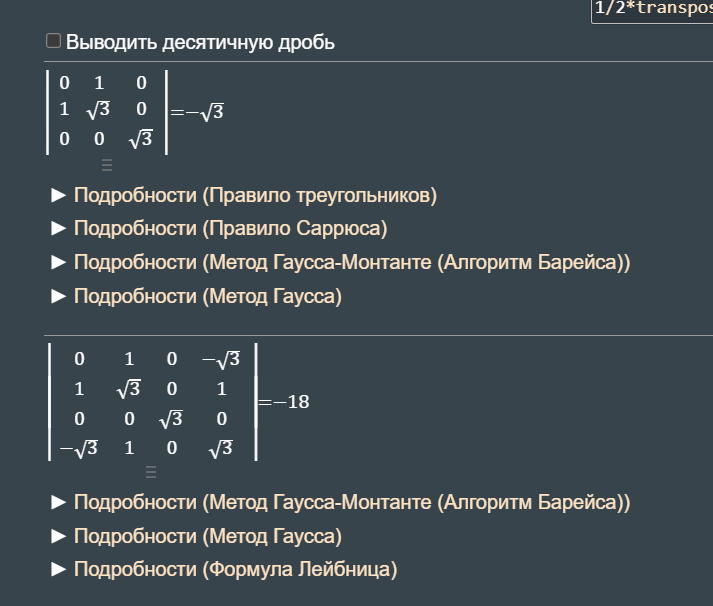


  Третье решение системы $(*)$:
 $\hat{H}=\begin{pmatrix} 
0 & 1 & 0 & \sqrt 3 \\
1 & -\sqrt 3 & 0 & 1 \\
0 & 0 & -\sqrt 3 & 0 \\
\sqrt 3 & 1 & 0 & -\sqrt 3
 \end{pmatrix}~~\Delta_1 = -\sqrt 3,~\Delta_2 = 18$,  значит третье решение есть максимум

 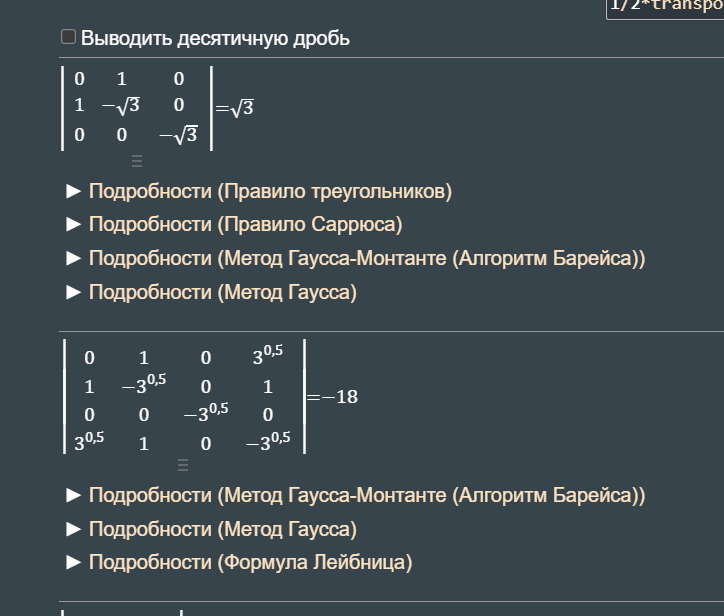


 Вычисления: https://www.desmos.com/calculator/fa8x1vn8zn



 Итого наш минимум: $x_{min}=\left( \dfrac{\sqrt 3}{2} - 1,~\dfrac{1}{2}, 0, -\dfrac{\sqrt 3}{2} \right)$


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

A = np.array([
    [2, 0, 2],
    [0, 2, 0],
    [0, 0, 2]
])

b = np.array([[0, 0, 1]]) 

xmin = np.array([
    -0.133974596216, # lambda
     0.5,             # x_1 
     0,               # x_2
    -0.866025403784  # x_3
])

p = np.array([0, 0, 0]) 
r = 1

np.linalg.det(A)

In [ ]:
def Norm2(v):
    return sum([_**2 for _ in v])**.5

def f(x):
    return x[0]*x[0] + x[1]*x[1] + x[2]*x[2] + x[0]*x[2] + x[2]

def g(x):
    return Norm2(x - p)**2 - r*r

def L(l, x):
    return f(x) + l*g(x)

def gradL(l, x):
    return np.array([
        g(x),
        2*x[0] + x[2] + 2*l*x[0],
        2*(1+l)*x[1],
        2*(1+l)*x[2] + 1 + x[0]
    ])

def GradientDescent(l0, x0, h0, eps):
    h = h0
    xcur = x0
    lcur = l0
    gf = gradL(lcur, xcur)
    vnext = np.array([lcur, *xcur]) - h*gf

    #count = 0

    while Norm2(gf) > eps:
        if L(vnext[0], vnext[1:]) >= L(lcur, xcur): h /= 2

        print(vnext, h)
        
        lcur = vnext[0]
        xcur = vnext[1:]
        gf = gradL(lcur, xcur)
        vnext = np.array([lcur, *xcur]) - h*gf

        #count += 1

    return vnext#, count


v = GradientDescent(0, np.array([1,0,0]), 0.5, 0.1)
v

In [ ]:
# def Norm2(v):
#     return sum([_**2 for _ in v])**.5

# def f(x):
#     return x[0]*x[0] + x[1]*x[1] + x[2]*x[2] + x[0]*x[2] + x[2]

# def g(x):
#     return Norm2(x - p)**2 - r*r

# def L(l, x):
#     return f(x) + l*g(x)

# def gradL(l, x):
#     return np.array([
#         g(x),
#         2*x[0] + x[2] + 2*l*x[0],
#         2*(1+l)*x[1],
#         2*(1+l)*x[2] + 1 + x[0]
#     ])

# def Jacobi(l, x):
#     return np.array([
#         [0,       2*x[0],  2*x[1],  2*x[2] ],
#         [2*x[0],  2+2*l,   0,       1      ],
#         [2*x[1],  0,       2+2*l,   0      ],
#         [2*x[2],  1,       0,       2+2*l  ],
#     ])


# def NewtonMethod(l0, x0, eps):
#     xk = gradL(l0, x0)
#     # print(xk)
#     # print(xk[0], xk[1:])
#     # print(gradL(xk[0], xk[1:]))

#     while Norm2(gradL(xk[0], xk[1:])) > eps:
#         #print(xk[0], xk[1:])
#         J = Jacobi(xk[0], xk[1:])
#         xk = xk - np.linalg.inv(J) @ gradL(xk[0], xk[1:])
#     return xk

# res = NewtonMethod(1, p - np.array([-r, 0, 0]), 0.001)
# L_, X_ = res[0], res[1:]

# #Norm2(gradL(L_, X_)), L(L_, X_), res, xmin

# L(xmin[0], xmin[1:]), L(L_, X_)